<a href="https://colab.research.google.com/github/mirayinc/USArrest_kmeans/blob/main/USArrest_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('USArrests.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
Murder,0
Assault,0
UrbanPop,0
Rape,0


Daha önce lineer regresyonda yaptığımız klasik adımları yaparak veriler hakkında fikir sahibi oluyoruz. Bu veri seti kaggle üzerinden alındığı için oldukça temiz.

In [7]:
# Eyalet isimleri 'Unnamed: 0' sütununda
df.rename(columns={'Unnamed: 0': 'State'}, inplace=True)
df.set_index('State', inplace=True)
df.head()
#Stateleri indeks ayarlamak, sonuçların yorumlanmasını kolaylaştırır.

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


K-Means algoritması, değişkenlerin ölçeklerine duyarlıdır. Bu nedenle verileri standartlaştırmak önemlidir.

In [8]:
scaler = StandardScaler()
#verilerin ort 0 stsapmalarını 1 olacak şekilde dönüştürüyor
scaled_features = scaler.fit_transform(df)
#ölçeklendirilmiş veriler

K-means modellerinde küme sayısını biz belirleriz. Bu veri seti için en uygun küme sayısını bulmak için aşağıdaki adımlar izlenir.

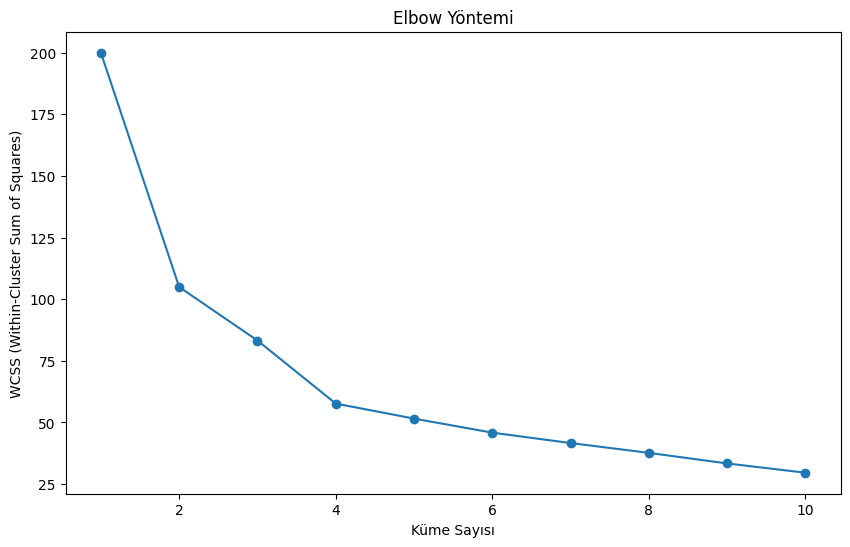

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# WCSS Grafiğinin Çizilmesi
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Yöntemi')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()
#küme sayısının 4 olmasına karar verdim, 4ten sonra değişim azalmış

In [10]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(scaled_features)
clusters = kmeans.labels_
#kmeans.labels_: Her bir veri noktasının ait olduğu küme etiketlerini içerir.

In [11]:
#Küme Etiketlerini Veri Setine Ekliyoruz
df['Cluster'] = clusters
df.head()

,Murder,Assault,UrbanPop,Rape,Cluster
State,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2


In [12]:
#veri seti çok boyutlu bunu PCA kullanarak 2 boyuta indircez
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['Cluster'] = clusters
pc_df['State'] = df.index
pc_df.head()


,PC1,PC2,Cluster,State
0,0.985566,-1.133392,1,Alabama
1,1.950138,-1.073213,2,Alaska
2,1.763164,0.745957,2,Arizona
3,-0.141420,-1.119797,1,Arkansas
4,2.523980,1.542934,2,California


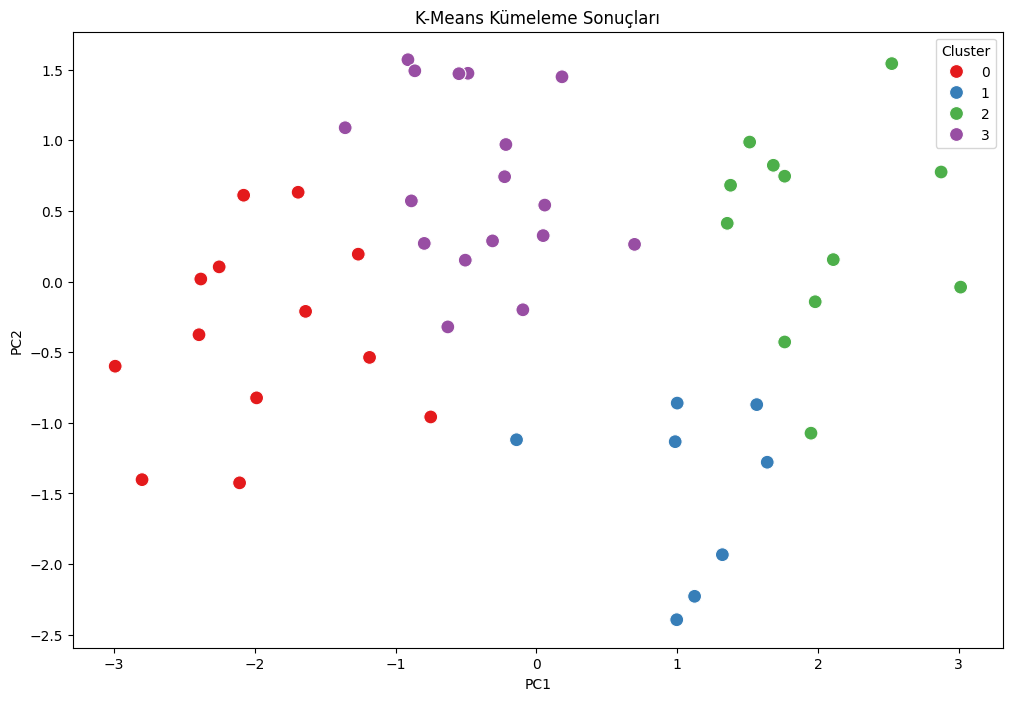

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100)
plt.title('K-Means Kümeleme Sonuçları')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

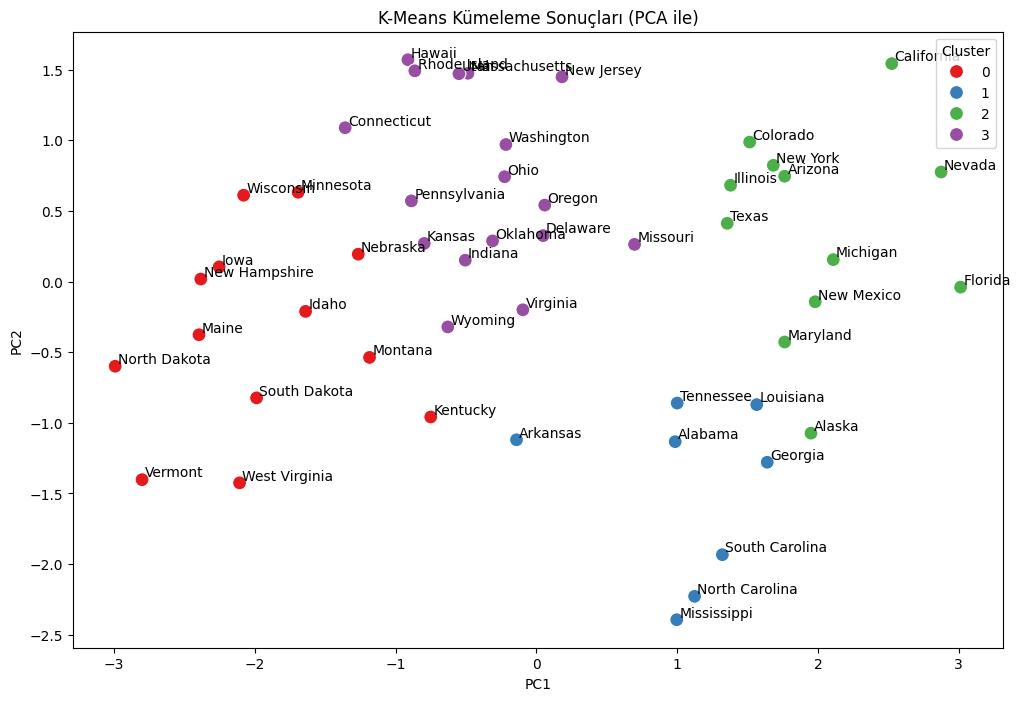

In [18]:
#veya isimleriyle birlikte de görselleştirebilirdik
plt.figure(figsize=(12,8))
sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100)
for i in range(pc_df.shape[0]):
    plt.text(x=pc_df.PC1[i]+0.02, y=pc_df.PC2[i]+0.02, s=pc_df.State[i], fontdict=dict(color='black',size=10))
plt.title('K-Means Kümeleme Sonuçları (PCA ile)')
plt.show()

In [19]:
cluster_profiles = df.groupby('Cluster').mean()
cluster_profiles
#her küme için değişkenlerin ortalama değerini hesaplar

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,3.600000,78.538462,52.076923,12.176923
1,13.937500,243.625000,53.750000,21.412500
2,10.966667,264.000000,76.500000,33.608333
3,5.852941,141.176471,73.647059,19.335294


**Küme Profillerinin Yorumu:**

* Cluster 0: Cinayet ve saldırı oranları yüksek, kentsel nüfus düşük olabilir.
* Cluster 1: Cinayet oranı düşük, diğer suç oranları da düşük olabilir.
* Cluster 2: Orta düzeyde suç oranlarına sahip olabilir.
* Cluster 3: Belirli suç türlerinde yüksek oranlara sahip olabilir.

Not: Bu yorumlar, cluster_profiles tablosundaki değerlere göre yapılmalıdır

In [21]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_features, clusters)
print('Silhouette Skoru:', silhouette_avg)
#Silhouette Skoru, -1 ile 1 arasında değer alır.
#1'e yakın olması, iyi bir kümeleme olduğunu gösterir.

Silhouette Skoru: 0.3441080718209351
